## Blop detection notebook



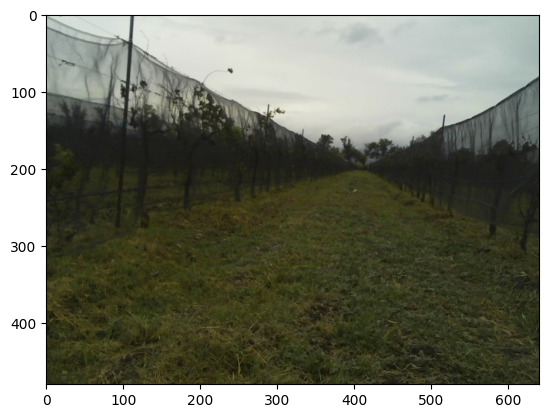

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

#img = cv2.imread("test_images/20221002-223527.jpg")
#img = cv2.imread("test_images/20221002-223338.jpg")
img = cv2.imread("test_images/20221019-203009.jpg")
#cv2.imshow("original",img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Convertion to rgb in order to maintain the same colors in cv2 and pyplot
plt.imshow(original)
plt.show()
image=original

## Grayscale transformation


(480, 640)

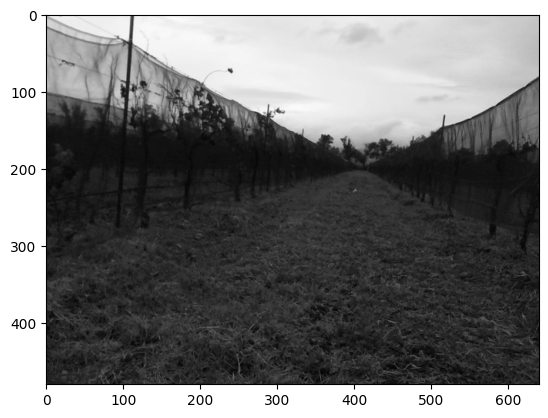

In [2]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
gray.shape

## Otsu Method




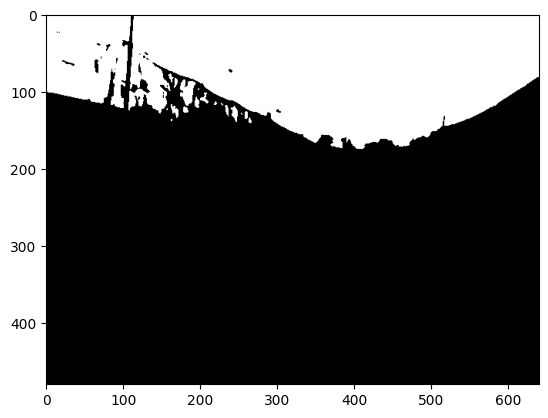

In [3]:
blur = cv2.GaussianBlur(gray,(5,5),0)
ret,otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(otsu,cmap='gray')



## Chose the biggest blop

19


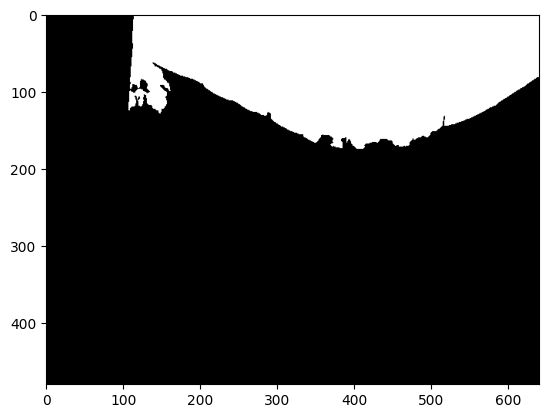

In [4]:
contours,hierarchy = cv2.findContours(otsu, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
output = otsu.copy()
maxContour = 0
for contour in contours:
    
    contourSize = cv2.contourArea(contour)
    if contourSize > maxContour:
        maxContour = contourSize
        maxContourData = contour

# Create a mask from the largest contour
mask = np.zeros_like(otsu)
mask = mask.astype('uint8')
mask=cv2.fillPoly(mask,[maxContourData],1)
print (len(contours))
plt.imshow(mask,cmap='gray')
otsu = mask


## Colum sum analisys

In [5]:
x,y = otsu.shape

array = np.array([np.sum(otsu[:, i]) for i in range(y)])
array = array.argsort()[::-1]

index = int(np.mean(array[0:5]))



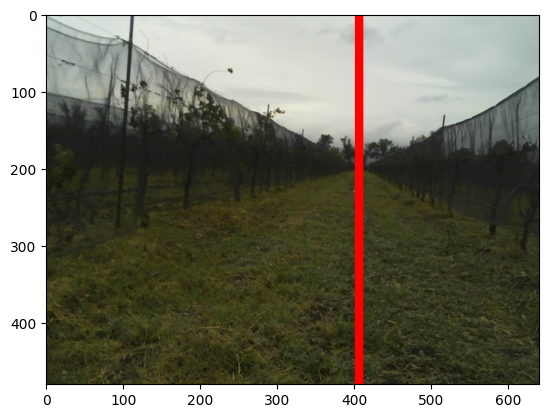

In [6]:
cv2.line(original,(index,0),(index,x),(255,0,0),9)
plt.imshow(original, cmap='gray')